In [1]:
# 1-1. 데이터 가져오기 

import pandas as pd 
import matplotlib.pyplot as plt 


socar = pd.read_csv('../../0. raw_data/insurance_fraud_detect_data.csv')
socar 

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
0,0,2,1,3,0,2,0,100,2,0,...,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,...,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,...,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,...,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,...,1209410,1,0,0,2,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,2,0,2,0,2,0,100,2,0,...,0,1,1,0,1,0,0,0,-1,0
15996,0,2,0,2,1,4,0,100,1,1,...,0,2,1,0,1,0,0,0,-1,0
15997,0,2,1,2,0,4,0,100,1,0,...,0,0,0,0,1,0,0,0,-1,1
15998,0,2,0,2,0,2,0,100,2,0,...,0,4,1,0,1,0,0,0,-1,0


In [2]:
# 테스트 셋 분리

df = socar[socar['test_set']==0]
df_test = socar[socar['test_set']==1]

In [3]:
# train-valid 분리 

from sklearn.model_selection import train_test_split

y_target = df['fraud_YN']
X_features = df.drop('fraud_YN', axis = 1)

X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size = 0.2, random_state = 13, stratify = y_target)

# 비율 확인 
print(y_train.value_counts()/y_train.shape[0]*100) 
print(y_valid.value_counts()/y_valid.shape[0]*100)

0    99.73794
1     0.26206
Name: fraud_YN, dtype: float64
0    99.728261
1     0.271739
Name: fraud_YN, dtype: float64


In [4]:
# test_set 분리 

X_test = df_test.drop('fraud_YN', axis = 1)
y_test = df_test['fraud_YN']

In [5]:
# 학습 / 예측 / 평가 함수 

# 평가 함수 

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    # confusion = confusion_matrix(y_test, pred) #오차행렬
    accuracy = accuracy_score(y_test,pred) # 정확도 
    precision = precision_score(y_test,pred) # 정밀도
    recall = recall_score(y_test,pred) # 재현율 
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred)
    return accuracy, precision, recall, f1, roc_auc

# 성능 DF 반환 

def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

# 다수의 모델 성능 비교 

def get_result_df(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['Accuracy', 'precision', 'recall', 'f1', 'roc']
    tmp = []
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)


# 성능 확인 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC


# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
# svm_clf = SVC(kernel='linear')

# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM',]
results = get_result_df(models, model_names, X_train, y_train, X_valid, y_valid)
results 


C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is i

,Accuracy,precision,recall,f1,roc
LogiReg,0.997283,0.0,0.0,0.0,0.5
DecisionTree,0.997283,0.0,0.0,0.0,0.5
RandomFore,0.997283,0.0,0.0,0.0,0.5
LGBM,0.997283,0.0,0.0,0.0,0.5


C:\Users\Yena\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Yena\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Yena\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

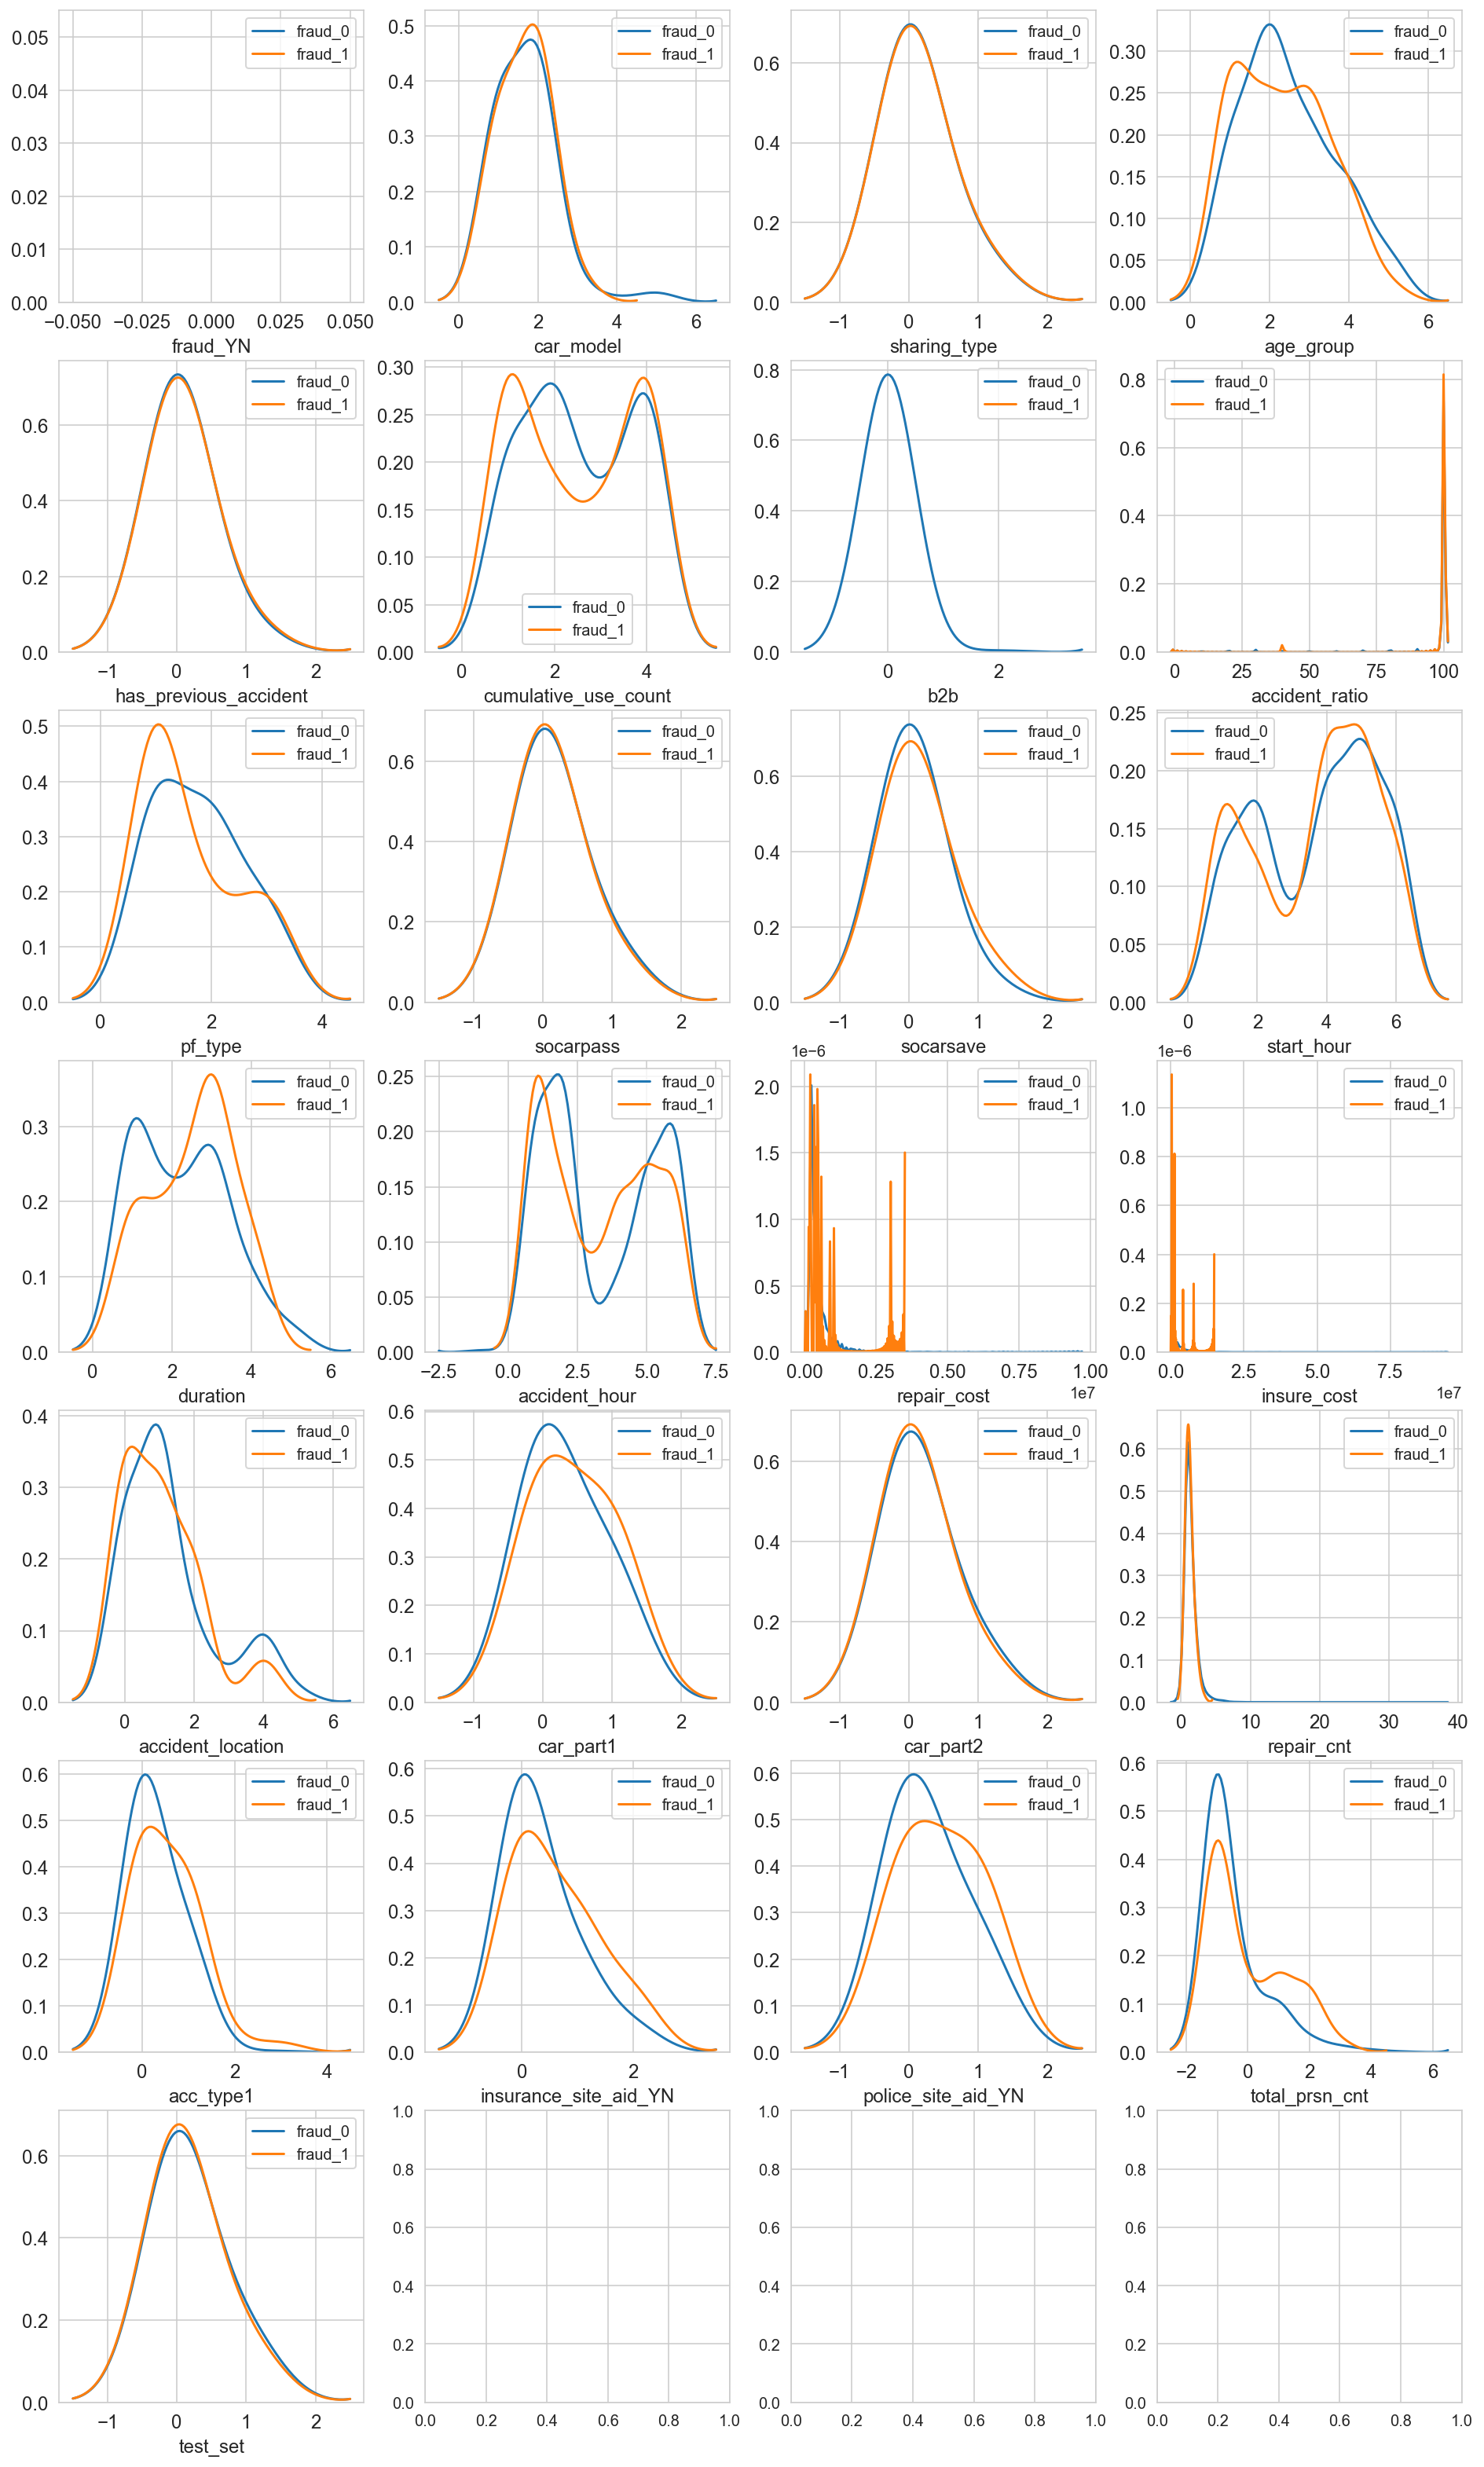

In [6]:
# 컬럼별 상관관계 확인 
import seaborn as sns

var = socar.columns.values 

i = 0

t0 = socar.loc[socar['fraud_YN']==0]
t1 = socar.loc[socar['fraud_YN']==1]

sns.set_style('whitegrid')
plt.figure()
fig,ax = plt.subplots(7,4,figsize=(16,28))


for feature in var:
    i += 1 
    plt.subplot(7,4,i)
    sns.kdeplot(t0[feature], bw=0.5, label = 'fraud_0')
    sns.kdeplot(t1[feature], bw=0.5, label = 'fraud_1')

    plt.xlabel(feature,fontsize=12)
    locs, labels = plt.xticks()

    plt.tick_params(axis='both', which = 'major', labelsize=12)

plt.show()

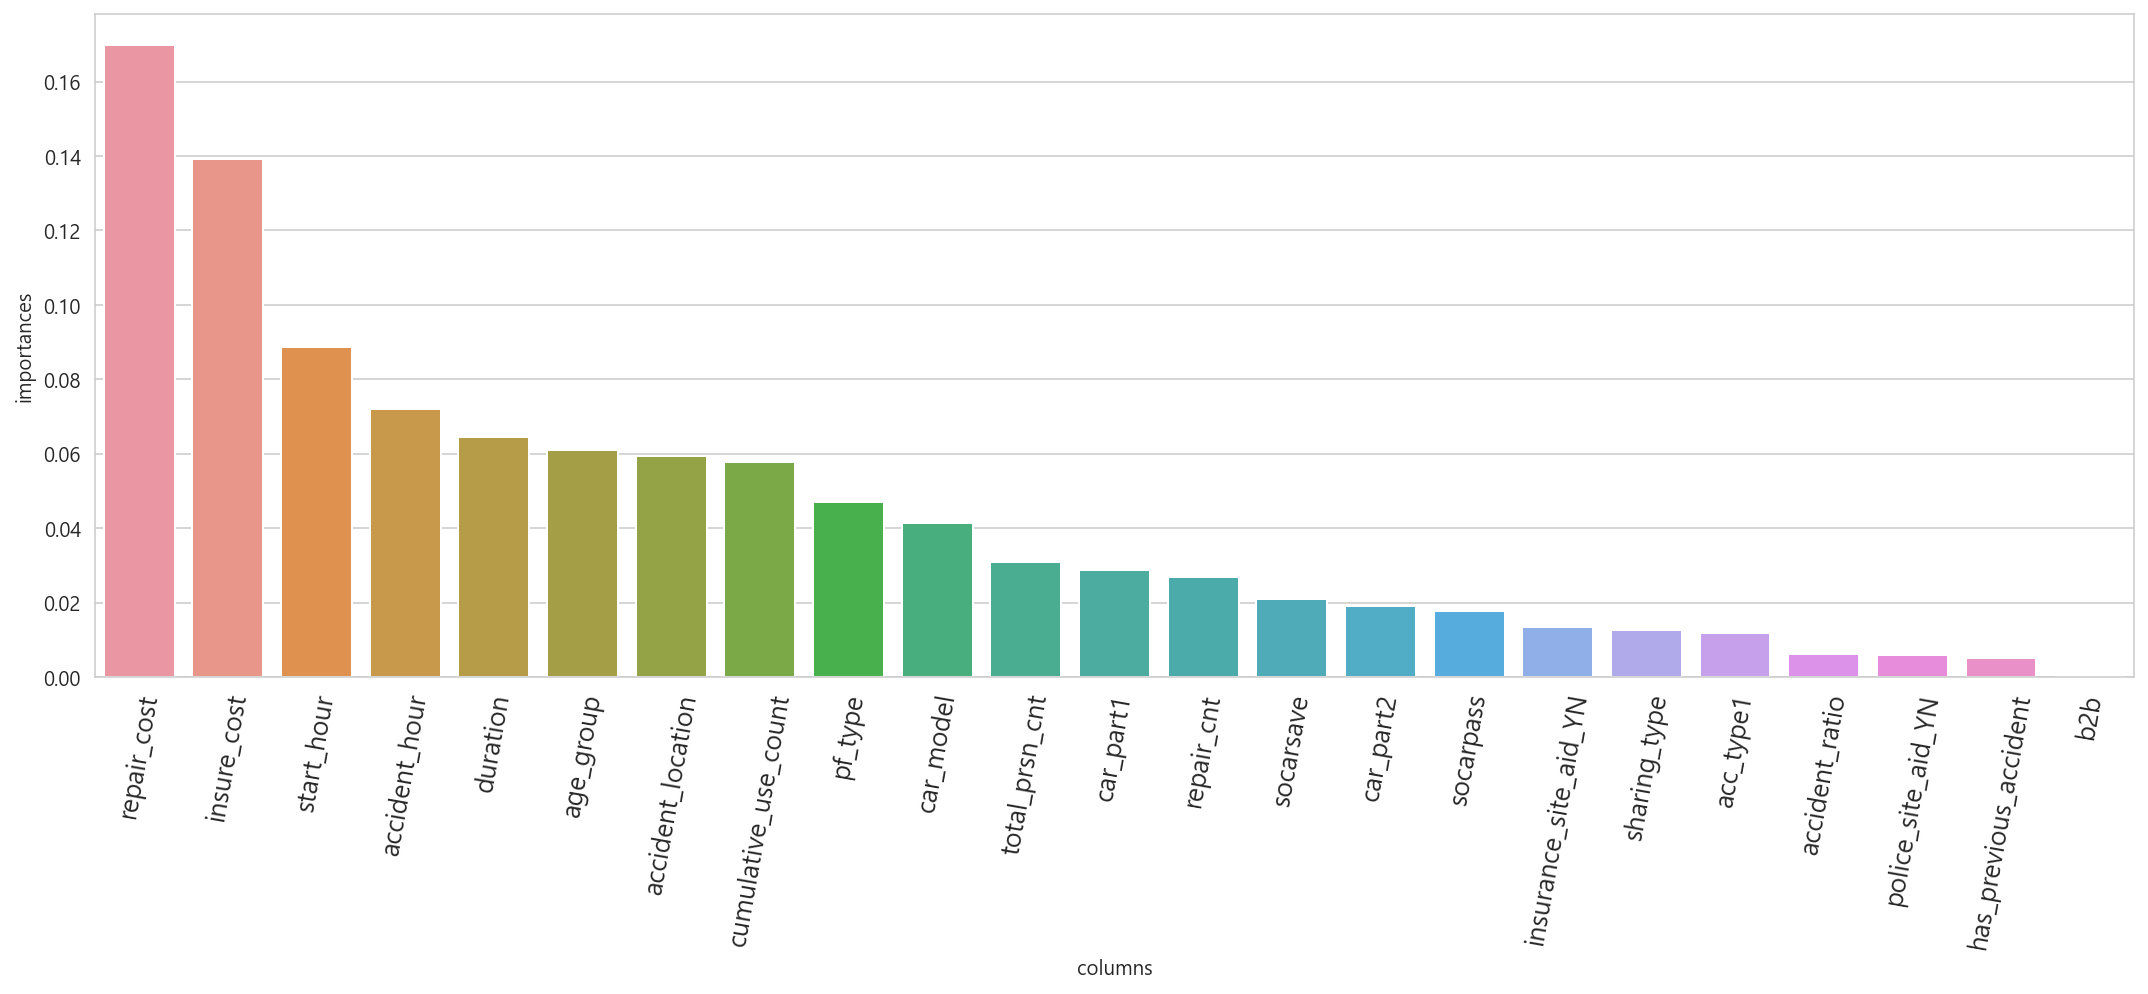

In [7]:
# feature importance 확인하기 - 랜덤포레스트 

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

feature_importance = rf_clf.feature_importances_

# plot
df_fi = pd.DataFrame({'columns':X_features.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] # importance가 0이상인 것만 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

# #Trial 1 

In [8]:
# 오버샘플링 적용 

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

X_train_over, y_train_over = smote.fit_sample(X_train,y_train)


# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
# svm_clf = SVC(kernel='linear')

# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM',]
results = get_result_df(models, model_names, X_train_over, y_train_over, X_valid, y_valid)
results 

,Accuracy,precision,recall,f1,roc
LogiReg,0.074146,0.002926,1.0,0.005836,0.535812
DecisionTree,0.793866,0.000000,0.0,0.000000,0.398015
RandomFore,0.995730,0.000000,0.0,0.000000,0.499221
LGBM,0.994177,0.000000,0.0,0.000000,0.498443


In [9]:
pd.options.display.float_format = '{:.5f}'.format

# #Trial 2

In [10]:
# 사고 시각 : -1 값에 대한 설명이 없음, 최빈값으로 대체하기 

df_1 = df.copy()
no_time = df_1[df_1['accident_hour']==-1]
time = df_1[df_1['accident_hour']!=-1]

time['accident_hour'].idxmax()

df_1.loc[(df_1.accident_hour == -1), 'accident_hour'] = time['accident_hour'].idxmax()

In [11]:
df_1['accident_hour'].value_counts()

2    3511
1    2970
6    2934
5    2228
4     901
3     309
8      26
Name: accident_hour, dtype: int64

In [12]:
# 학습 / 평가 

########## 데이터 분리 ##########
X_features = df_1.drop(columns=['fraud_YN'], axis=1)
y_target = df_1['fraud_YN']

from sklearn.model_selection import train_test_split

y_target = df_1['fraud_YN']
X_features = df_1.drop('fraud_YN', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target) #stratify 를 적용해서 train, test 분포를 비슷하게 처리 

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)

######### 오버샘플링 ##########

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

models=[lr_clf,dt_clf,rf_clf,lgbm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_over, y_train_over, X_valid, y_valid)



In [13]:
results

,Accuracy,precision,recall,f1,roc
LogiReg,0.07415,0.00293,1.00000,0.00584,0.53581
DecisionTree,0.79425,0.00000,0.00000,0.00000,0.39821
RandomFore,0.99495,0.00000,0.00000,0.00000,0.49883
LGBM,0.99457,0.00000,0.00000,0.00000,0.49864


In [14]:
df_2 = df.copy()

# 차량 수리비용  : 0값에 대해 평균 수리 비용 

df_2['repair_cost'].value_counts()

repair_cost_mean = df_2[df_2['repair_cost']!=0]['repair_cost'].mean()
repair_cost_mean

df_2.loc[(df_2.repair_cost == 0), 'repair_cost'] = repair_cost_mean

df_2['repair_cost'].value_counts()

452453.96225     4811
233148.24510       24
183486.50850       16
235376.71580       16
154407.96570       13
                 ... 
648480.24100        1
119653.57540        1
220861.46010        1
113932.13860        1
2218922.18900       1
Name: repair_cost, Length: 7363, dtype: int64

In [15]:
# 학습 / 평가 

########## 데이터 분리 ##########
X_features = df_2.drop(columns=['fraud_YN'], axis=1)
y_target = df_2['fraud_YN']

from sklearn.model_selection import train_test_split

y_target = df_2['fraud_YN']
X_features = df_2.drop('fraud_YN', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target) #stratify 를 적용해서 train, test 분포를 비슷하게 처리 

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)

######### 오버샘플링 ##########

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

models=[lr_clf,dt_clf,rf_clf,lgbm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_over, y_train_over, X_valid, y_valid)

results

,Accuracy,precision,recall,f1,roc
LogiReg,0.01242,0.00274,1.00000,0.00547,0.50487
DecisionTree,0.73020,0.00145,0.14286,0.00287,0.43733
RandomFore,0.99573,0.00000,0.00000,0.00000,0.49922
LGBM,0.99340,0.00000,0.00000,0.00000,0.49805


# #Trial 3

In [16]:
df_3 = df.copy()

In [17]:
# 보험 손해비용  : 0값에 대해 평균 손해 비용 


insure_cost_mean = df_3[df_3['insure_cost']!=0]['insure_cost'].mean()
insure_cost_mean

df_3.loc[(df_3.insure_cost == 0), 'insure_cost'] = insure_cost_mean

df_3['insure_cost'].value_counts()

2394992.71054    8374
300000.00000       68
400000.00000       61
500000.00000       52
200000.00000       45
                 ... 
676760.00000        1
895560.00000        1
8561730.00000       1
5396000.00000       1
1441800.00000       1
Name: insure_cost, Length: 3730, dtype: int64

In [18]:
# 학습 / 평가 

########## 데이터 분리 ##########
from sklearn.model_selection import train_test_split

y_target = df_3['fraud_YN']
X_features = df_3.drop('fraud_YN', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target) #stratify 를 적용해서 train, test 분포를 비슷하게 처리 

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)

######### 오버샘플링 ##########

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

models=[lr_clf,dt_clf,rf_clf,lgbm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_over, y_train_over, X_valid, y_valid)

results

,Accuracy,precision,recall,f1,roc
LogiReg,0.79658,0.00193,0.14286,0.00380,0.47061
DecisionTree,0.82415,0.00000,0.00000,0.00000,0.41320
RandomFore,0.99573,0.00000,0.00000,0.00000,0.49922
LGBM,0.99379,0.00000,0.00000,0.00000,0.49825


# #Trial 4

In [19]:
df_4 = df.copy()

In [20]:
# combine sampling 
# SMOTE + ENN 

from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)


model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)

results

,Accuracy,precision,recall,f1,roc
LogiReg,0.67314,0.00238,0.28571,0.00473,0.47995
DecisionTree,0.83929,0.00244,0.14286,0.00481,0.49202
RandomFore,0.99379,0.00000,0.00000,0.00000,0.49825
LGBM,0.98913,0.00000,0.00000,0.00000,0.49591


In [21]:
# SMOKE + TOMEK 

from imblearn.combine import SMOTETomek
tmk = SMOTETomek(random_state =13)
X_train_tmk , y_train_tmk  = tmk.fit_sample(X_train,y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_tmk, y_train_tmk, X_valid, y_valid)

results

,Accuracy,precision,recall,f1,roc
LogiReg,0.80551,0.00202,0.14286,0.00398,0.47509
DecisionTree,0.82415,0.00000,0.00000,0.00000,0.41320
RandomFore,0.99495,0.00000,0.00000,0.00000,0.49883
LGBM,0.99301,0.00000,0.00000,0.00000,0.49786


# #Trial 5 

In [22]:
df_5 = df.copy()
y_target = df_5['fraud_YN']
X_features = df_5.drop('fraud_YN', axis=1)

In [23]:
y_target = df_5['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.head()


,component_1,component_2,target
0,-1.19081,-1.12246,0
1,-0.65211,-0.03384,0
2,-1.35593,1.63294,0
3,4.34430,-0.89157,1
4,3.89672,-1.96616,0


In [25]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
# svm_clf = SVC(kernel='linear')

# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM',]
results = get_result_df(models, model_names, X_train, y_train, X_valid, y_valid)
results 


C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,precision,recall,f1,roc
LogiReg,0.99728,0.00000,0.00000,0.00000,0.50000
DecisionTree,0.99689,0.00000,0.00000,0.00000,0.49981
RandomFore,0.99689,0.00000,0.00000,0.00000,0.49981
LGBM,0.99495,0.00000,0.00000,0.00000,0.49883


In [26]:
# 복합 샘플링 적용 

from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)


model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)

results

,Accuracy,precision,recall,f1,roc
LogiReg,0.65101,0.00554,0.71429,0.01100,0.68256
DecisionTree,0.51630,0.00081,0.14286,0.00160,0.33009
RandomFore,0.77834,0.00177,0.14286,0.00349,0.46146
LGBM,0.78339,0.00360,0.28571,0.00712,0.53523


In [27]:
# SMOKE + TOMEK 

from imblearn.combine import SMOTETomek
tmk = SMOTETomek(random_state =13)
X_train_tmk , y_train_tmk  = tmk.fit_sample(X_train,y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_tmk, y_train_tmk, X_valid, y_valid)

results

,Accuracy,precision,recall,f1,roc
LogiReg,0.68750,0.00619,0.71429,0.01227,0.70086
DecisionTree,0.49262,0.00077,0.14286,0.00153,0.31822
RandomFore,0.82958,0.00459,0.28571,0.00903,0.55839
LGBM,0.83113,0.00691,0.42857,0.01361,0.63040


# #Trial 6

In [28]:
df_6 = df.copy()
y_target = df_6['fraud_YN']
X_features = df_6.drop('fraud_YN', axis=1)

y_target = df_6['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=3)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2','component_3']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.head()


,component_1,component_2,component_3,target
0,-1.19090,-1.12458,-0.22414,0
1,-0.65303,-0.06768,1.42119,0
2,-1.35619,1.60968,-0.97700,0
3,4.34421,-0.87168,0.35128,1
4,3.89674,-1.98364,0.13330,0


In [30]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
# svm_clf = SVC(kernel='linear')

# SMOKE + TOMEK 

from imblearn.combine import SMOTETomek
tmk = SMOTETomek(random_state =13)
X_train_tmk , y_train_tmk  = tmk.fit_sample(X_train,y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_tmk, y_train_tmk, X_valid, y_valid)

results


,Accuracy,precision,recall,f1,roc
LogiReg,0.68012,0.00605,0.71429,0.01199,0.69716
DecisionTree,0.49884,0.00233,0.42857,0.00463,0.46380
RandomFore,0.93789,0.01274,0.28571,0.02439,0.61269
LGBM,0.94177,0.01361,0.28571,0.02597,0.61464


In [31]:

from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)


model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)

results

,Accuracy,precision,recall,f1,roc
LogiReg,0.62034,0.00510,0.71429,0.01012,0.66719
DecisionTree,0.49922,0.00233,0.42857,0.00463,0.46399
RandomFore,0.91382,0.00913,0.28571,0.01770,0.60062
LGBM,0.90839,0.00858,0.28571,0.01667,0.59790


# #Trial 7

In [32]:
df_7 = df.copy()
y_target = df_7['fraud_YN']
X_features = df_7.drop('fraud_YN', axis=1)

y_target = df_7['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=4)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2','component_3','component_4']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.head()


,component_1,component_2,component_3,component_4,target
0,-1.19056,-1.09285,-0.22985,0.73807,0
1,-0.65211,-0.04808,1.44022,2.34789,0
2,-1.35590,1.62542,-0.97814,-1.90017,0
3,4.34437,-0.85574,0.32139,0.37330,1
4,3.89716,-1.97055,0.12905,0.15723,0


In [34]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
# svm_clf = SVC(kernel='linear')

# SMOKE + TOMEK 

from imblearn.combine import SMOTETomek
tmk = SMOTETomek(random_state =13)
X_train_tmk , y_train_tmk  = tmk.fit_sample(X_train,y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_tmk, y_train_tmk, X_valid, y_valid)

results


,Accuracy,precision,recall,f1,roc
LogiReg,0.66654,0.00580,0.71429,0.01151,0.69035
DecisionTree,0.43284,0.00477,1.00000,0.00949,0.71565
RandomFore,0.96312,0.00000,0.00000,0.00000,0.48287
LGBM,0.96312,0.01111,0.14286,0.02062,0.55411


In [35]:
# smoteen
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)


model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)

results

,Accuracy,precision,recall,f1,roc
LogiReg,0.58773,0.00469,0.71429,0.00933,0.65084
DecisionTree,0.43284,0.00477,1.00000,0.00949,0.71565
RandomFore,0.94138,0.00685,0.14286,0.01307,0.54321
LGBM,0.93362,0.01190,0.28571,0.02286,0.61055


# #Trial 8

In [36]:
df_8 = df.copy()

In [37]:
# 차량 수리비용  : 0값에 대해 평균 수리 비용 

df_8['repair_cost'].value_counts()

repair_cost_mean = df_8[df_8['repair_cost']!=0]['repair_cost'].mean()
repair_cost_mean

df_8.loc[(df_8.repair_cost == 0), 'repair_cost'] = repair_cost_mean

df_8['repair_cost'].value_counts()

452453.96225     4811
233148.24510       24
183486.50850       16
235376.71580       16
154407.96570       13
                 ... 
648480.24100        1
119653.57540        1
220861.46010        1
113932.13860        1
2218922.18900       1
Name: repair_cost, Length: 7363, dtype: int64

In [38]:
y_target = df_8['fraud_YN']
X_features = df_8.drop('fraud_YN', axis=1)

y_target = df_8['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=4)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2','component_3','component_4']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.head()

,component_1,component_2,component_3,component_4,target
0,-1.21709,-1.31684,-0.15897,0.49845,0
1,-0.57541,-0.17186,1.53981,2.33138,0
2,-1.34395,1.61880,-1.10025,-1.78573,0
3,4.33563,-0.83313,0.41960,0.34160,1
4,3.88101,-1.80384,0.21278,0.22805,0


In [40]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)

In [41]:
# smoteen
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)


model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)

results

,Accuracy,precision,recall,f1,roc
LogiReg,0.59433,0.00477,0.71429,0.00948,0.65415
DecisionTree,0.50233,0.00312,0.57143,0.00620,0.53678
RandomFore,0.94177,0.00690,0.14286,0.01316,0.54340
LGBM,0.93672,0.00633,0.14286,0.01212,0.54087


In [42]:
# SMOKE + TOMEK 

from imblearn.combine import SMOTETomek
tmk = SMOTETomek(random_state =13)
X_train_tmk , y_train_tmk  = tmk.fit_sample(X_train,y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_tmk, y_train_tmk, X_valid, y_valid)

results

,Accuracy,precision,recall,f1,roc
LogiReg,0.66693,0.00466,0.57143,0.00924,0.61931
DecisionTree,0.49806,0.00309,0.57143,0.00615,0.53464
RandomFore,0.96933,0.01351,0.14286,0.02469,0.55722
LGBM,0.96390,0.01136,0.14286,0.02105,0.55450


# #Trial 9


In [43]:
df_9 = df.copy()

In [44]:
# 보험 손해비용  : 0값에 대해 평균 손해 비용 


insure_cost_mean = df_9[df_9['insure_cost']!=0]['insure_cost'].mean()
insure_cost_mean

df_9.loc[(df_9.insure_cost == 0), 'insure_cost'] = insure_cost_mean

df_9['insure_cost'].value_counts()

2394992.71054    8374
300000.00000       68
400000.00000       61
500000.00000       52
200000.00000       45
                 ... 
676760.00000        1
895560.00000        1
8561730.00000       1
5396000.00000       1
1441800.00000       1
Name: insure_cost, Length: 3730, dtype: int64

In [45]:
y_target = df_9['fraud_YN']
X_features = df_9.drop('fraud_YN', axis=1)

y_target = df_9['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=3)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2','component_3']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.head()

,component_1,component_2,component_3,target
0,-1.15956,-1.17722,-0.03906,0
1,-0.64134,0.13544,1.54570,0
2,-1.38657,1.35386,-1.24679,0
3,4.35965,-0.88242,0.47004,1
4,3.96377,-1.68183,0.32930,0


In [47]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)

In [48]:
# SMOKE + TOMEK 

from imblearn.combine import SMOTETomek
tmk = SMOTETomek(random_state =13)
X_train_tmk , y_train_tmk  = tmk.fit_sample(X_train,y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_tmk, y_train_tmk, X_valid, y_valid)

results

,Accuracy,precision,recall,f1,roc
LogiReg,0.68168,0.00608,0.71429,0.01205,0.69794
DecisionTree,0.43439,0.00274,0.57143,0.00546,0.50272
RandomFore,0.94138,0.00000,0.00000,0.00000,0.47197
LGBM,0.94061,0.00000,0.00000,0.00000,0.47158


# #Trial 10 

In [49]:
df_10 = df.copy()

In [50]:
y_target = df_10['fraud_YN']
X_features = df_10.drop('fraud_YN', axis=1)

y_target = df_10['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(df_scaled, y_target)
df_lda = lda.transform(df_scaled)

lda_columns = ['component_1']

DF_lda = pd.DataFrame(df_lda, columns=lda_columns)
DF_lda['target'] = y_target 
DF_lda.head()

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,component_1,target
0,-0.53407,0
1,-0.93069,0
2,-0.26140,0
3,2.41750,1
4,0.08176,0


In [52]:
y_target = DF_lda['target']
X_features = DF_lda.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)

In [53]:
# smoteen
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)


model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)

results

,Accuracy,precision,recall,f1,roc
LogiReg,0.78067,0.00707,0.57143,0.01396,0.67633
DecisionTree,0.64674,0.00330,0.42857,0.00655,0.53795
RandomFore,0.72477,0.00424,0.42857,0.00839,0.57707
LGBM,0.74379,0.00455,0.42857,0.00901,0.58661


In [54]:
# SMOKE + TOMEK 

from imblearn.combine import SMOTETomek
tmk = SMOTETomek(random_state =13)
X_train_tmk , y_train_tmk  = tmk.fit_sample(X_train,y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_tmk, y_train_tmk, X_valid, y_valid)

results

,Accuracy,precision,recall,f1,roc
LogiReg,0.75194,0.00625,0.57143,0.01236,0.66193
DecisionTree,0.77174,0.00511,0.42857,0.01010,0.60062
RandomFore,0.67974,0.00364,0.42857,0.00722,0.55450
LGBM,0.72477,0.00424,0.42857,0.00839,0.57707


# #Trial 11

In [55]:
df_11 = df.copy()

In [56]:
y_target = df_11['fraud_YN']
X_features = df_11.drop('fraud_YN', axis=1)

y_target = df_11['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=3)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2','component_3']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.head()


,component_1,component_2,component_3,target
0,-10.87806,-1.68114,-0.44449,0
1,89.08826,-0.44665,3.49009,0
2,-10.91983,0.59550,0.76533,0
3,-10.86150,0.62679,-1.25563,1
4,89.14616,-0.59104,-0.50748,0


In [58]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)

In [59]:
# smoteen
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)


model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)

results

,Accuracy,precision,recall,f1,roc
LogiReg,0.14363,0.00271,0.85714,0.00541,0.49942
DecisionTree,0.73602,0.00442,0.42857,0.00875,0.58272
RandomFore,0.89169,0.00725,0.28571,0.01413,0.58953
LGBM,0.88781,0.00699,0.28571,0.01365,0.58758


In [60]:
# SMOKE + TOMEK 

from imblearn.combine import SMOTETomek
tmk = SMOTETomek(random_state =13)
X_train_tmk , y_train_tmk  = tmk.fit_sample(X_train,y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM']
results = get_result_df(models, model_names, X_train_tmk, y_train_tmk, X_valid, y_valid)

results

,Accuracy,precision,recall,f1,roc
LogiReg,0.14713,0.00272,0.85714,0.00543,0.50117
DecisionTree,0.74340,0.00455,0.42857,0.00900,0.58641
RandomFore,0.92896,0.01111,0.28571,0.02139,0.60821
LGBM,0.92158,0.01005,0.28571,0.01942,0.60452
